In [ ]:
#! pip install jupyter_dash
#! pip install --upgrade plotly
#! wget https://github.com/CSSEGISandData/COVID-19/raw/master/cs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dash 
from jupyter_dash import JupyterDash 
from dash import dcc
import dash_html_components as html 
import plotly.express as px
from dash.dependencies import Input, Output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import sys


In [ ]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color='#1f77b4',
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv("/content/All items in U.S. city average, all urban consumers, not seasonally adjusted - BLS Data Series.csv", parse_dates=['Year'])


In [ ]:
df.set_index("Year").to_period('M')
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2012-01-01,226.665,227.663,229.392,230.085,229.815,229.478,229.104,230.379,231.407,231.317,230.221,229.601
1,2013-01-01,230.280,232.166,232.773,232.531,232.945,233.504,233.596,233.877,234.149,233.546,233.069,233.049
2,2014-01-01,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812
3,2015-01-01,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525
4,2016-01-01,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432


In [ ]:
px.line(df, x=df['Year'], y='Jan')

#### Edit below (or entire code) 




In [ ]:
app = JupyterDash(__name__)

app.layout = html.Div([
  dcc.Dropdown(id="my_dropdown",
    options=[{"value": df['Jan'], "label": df['Jan']} for country in df.columns.unique()],
    value=["Jan"],
    multi=True
    ),
  dcc.Graph(id="my_graph")
])

@app.callback(Output("my_graph", "figure"), Input("my_dropdown", "value"))
def update_graph(selected_cpi):
  return px.line(df, x="Year", y=selected_cpi)

app.run_server(mode="inline")

<IPython.core.display.Javascript object>

In [ ]:
app = JupyterDash(__name__)

color_opt = [dict(label=x, value=x) for x in df_map.columns]
del color_opt[2]
del color_opt[1]
date_opt = color_opt.copy()
del date_opt[0]

app.layout = html.Div(
    [
        html.Div(
            [
                html.P(["date:", dcc.Dropdown(id='date', options=date_opt)]),
                html.P(["color:", dcc.Dropdown(id='color', options=color_opt)]),
            ],
            style={"width": "20%", "float": "left"}
        ),
        dcc.Graph(id="graph", style={"width": "80%", "display": "inline-block"}),
    ]
)

@app.callback(Output("graph", "figure"), [Input("date", "value"), Input("color", "value")])
def update_graph(date, color):
  px.set_mapbox_access_token(MAPBOX_TOKEN)
  if not color:
    color = date
  return  px.scatter_mapbox(df_map,
                        lat="Lat",
                        lon="Long",
                        color=color,
                        size=date,
                        size_max=20,
                        zoom=0,
                        center={'lat': 35, 'lon': 135},
                        title="CPI Levels by Geographical Region",
                        color_continuous_scale=px.colors.diverging.BrBG,
                        hover_name=date)

app.run_server(mode="inline")

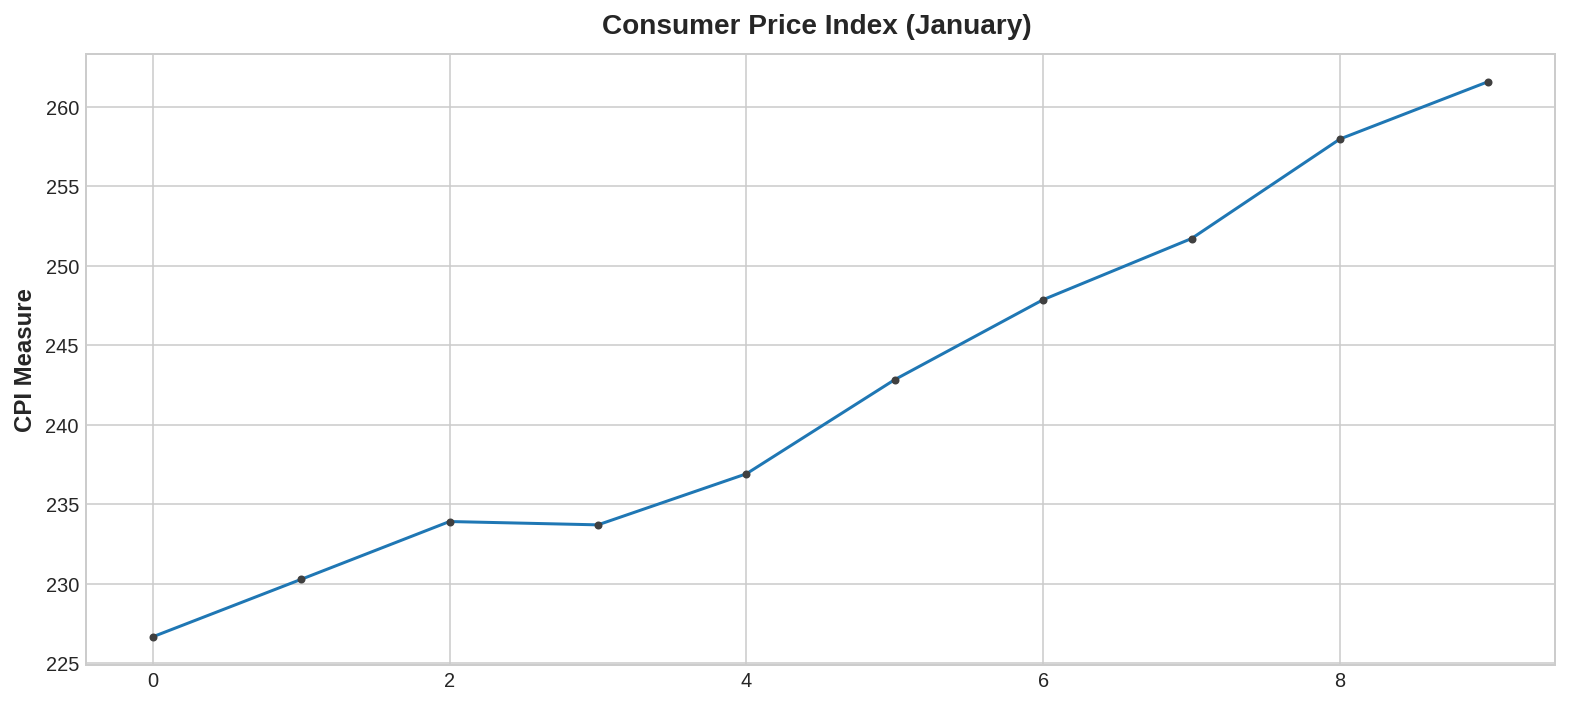

In [ ]:
ax = df['Year'].plot(**plot_params)
ax.set(title="Consumer Price Index (January) ", ylabel="CPI Measure");

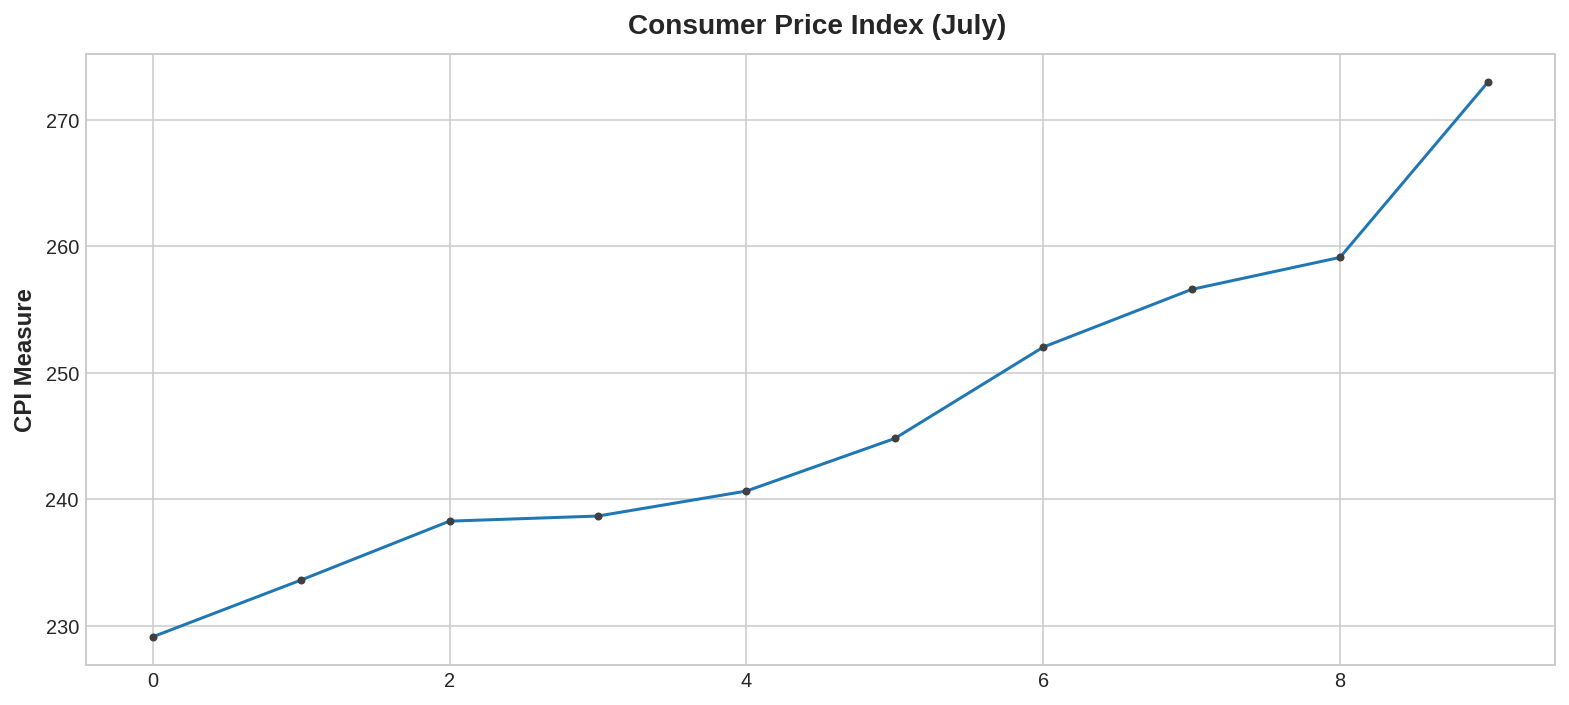

In [ ]:
ax = df['Jul'].plot(**plot_params)
ax.set(title="Consumer Price Index (July) ", ylabel="CPI Measure");

In [ ]:
trend = df.rolling(
        window=12,
        center=True,
        min_periods=6,
        ).mean()

In [ ]:
ax = df.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)